<a href="https://colab.research.google.com/github/Bigbosscat13/git_test/blob/main/New_LSTM_Hourly_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

import math
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# อ่านไฟล์ Excel ทั้งสองไฟล์
df1 = pd.read_csv('/content/2023.csv', parse_dates=['datetime'])
df2 = pd.read_csv('/content/2024.csv', parse_dates=['datetime'])

# รวมไฟล์โดยใช้ pd.concat
data = pd.concat([df1, df2], ignore_index=True)

# บันทึกไฟล์ที่รวมแล้วเป็นไฟล์ CSV
data.to_csv('kwh_2324.csv', index=False)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/kwh_2324.csv', parse_dates=['datetime'])

# Convert datetime to pandas datetime
data['datetime'] = pd.to_datetime(data['datetime'], format='%d/%m/%Y %H:%M')
data = data.sort_values('datetime')

In [ ]:
data

,datetime,kwh
0,2023-01-01 02:03:00,3.2565
1,2023-01-01 02:04:00,3.2565
2,2023-01-01 02:05:00,3.2565
3,2023-01-01 02:06:00,3.2565
4,2023-01-01 02:07:00,3.2565
...,...,...
1052512,2024-12-31 23:55:00,2.6500
1052513,2024-12-31 23:56:00,2.6500
1052514,2024-12-31 23:57:00,2.6500
1052515,2024-12-31 23:58:00,2.6500


In [ ]:
data.describe()

,datetime,kwh
count,1052517,1.052517e+06
mean,2024-01-01 13:00:59.999995648,2.718133e+00
min,2023-01-01 02:03:00,0.000000e+00
25%,2023-07-02 19:32:00,2.500000e+00
50%,2024-01-01 13:01:00,2.850000e+00
75%,2024-07-02 06:30:00,3.240400e+00
max,2024-12-31 23:59:00,2.579170e+01
std,NaN,7.461613e-01


In [ ]:
# Set 'datetime' column as the index before resampling
data = data.set_index('datetime')

# Resample to 5-minute data
data_5min = data.resample('5min').sum()

# สร้างข้อมูลรายวัน (Daily)
daily_data = data.resample('D').sum()

hourly_data = data.resample('h').sum()
# สร้างข้อมูลรายสัปดาห์ (Weekly)
weekly_data = data.resample('W').sum()
# สร้างข้อมูลรายเดือน (Monthly)
monthly_data = data.resample('ME').sum()

<Axes: xlabel='datetime'>

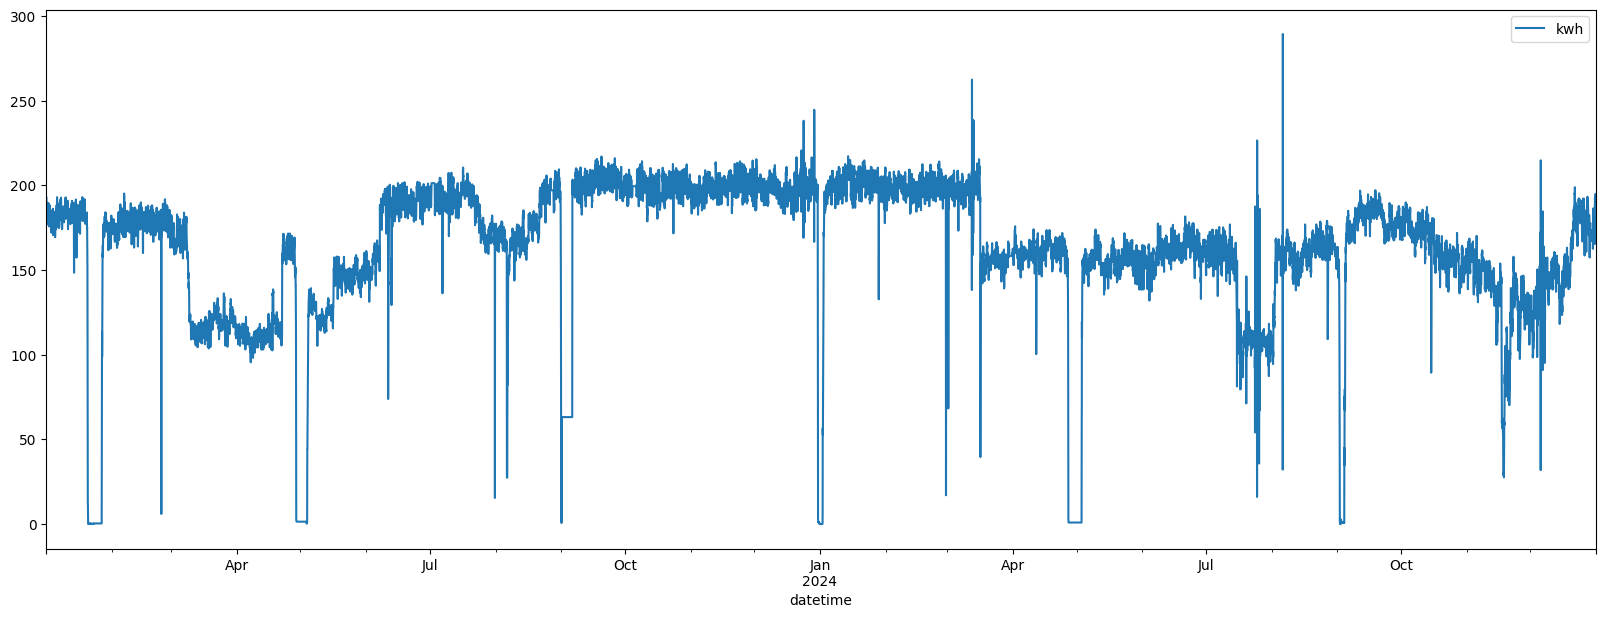

In [ ]:
hourly_data.plot(figsize=(20,7))

In [ ]:
##splitting dataset into train and test split
training_size= int(len(hourly_data)*0.80)
test_size = len(hourly_data) - training_size  # Calculate test_size based on training_size

# Split into train and test data only
train_data, test_data = hourly_data[0:training_size], hourly_data[training_size:]

<ipython-input-6-79b80ff9eb3d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['kwh'] = scaler.fit_transform(train_data[['kwh']])
<ipython-input-6-79b80ff9eb3d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['kwh'] = scaler.transform(test_data[['kwh']])


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


217/217 ━━━━━━━━━━━━━━━━━━━━ 42s 175ms/step - loss: 0.0375 - val_loss: 0.0015
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 37s 173ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 39s 164ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 38s 177ms/step - loss: 0.0021 - val_loss: 9.1848e-04
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 39s 170ms/step - loss: 0.0015 - val_loss: 8.5286e-04
Epoch 7/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 169ms/step - loss: 0.0013 - val_loss: 7.9473e-04
Epoch 8/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 165ms/step - loss: 0.0012 - val_loss: 8.2133e-04
Epoch 9/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 37s 170ms/step - loss: 0.0011 - val_loss: 7.1026e-04
Epoch 10/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 165ms/step - loss: 0.0012 - val_loss: 6.8556e-04
Epoch 11/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - loss: 0.0012 - val_loss: 6.6110e-04
Ep

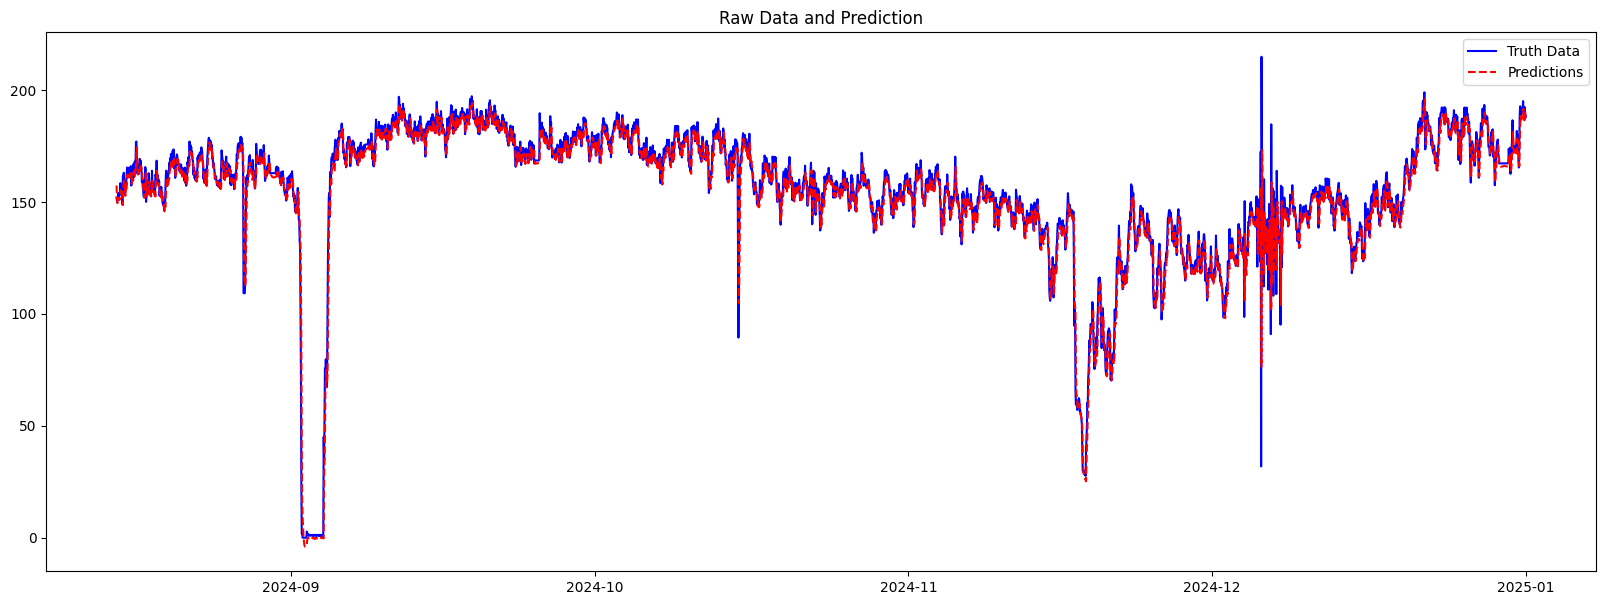

In [ ]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to create features with lagged values
def create_lstm_features(data, max_lags):
    df = data.copy()
    sequences = []
    targets = []

    for i in range(max_lags, len(df)):
        sequences.append(df.iloc[i - max_lags:i]['kwh'].values)
        targets.append(df.iloc[i]['kwh'])

    return np.array(sequences), np.array(targets)

# Load and scale data
scaler = MinMaxScaler()
train_data['kwh'] = scaler.fit_transform(train_data[['kwh']])
test_data['kwh'] = scaler.transform(test_data[['kwh']])

# Define number of lags
best_lags = 168  # Assume best_lags was selected
X_train, y_train = create_lstm_features(train_data, best_lags)
X_test, y_test = create_lstm_features(test_data, best_lags)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)
training_time = time.time() - start_time
print(f'Training time: {training_time/60:.2f} minutes')

# Get predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score on Test set: {rmse:.2f}')

# Plot predictions vs actual values
plt.figure(figsize=(20, 7))
plt.plot(test_data.index[best_lags:], y_test, label='Truth Data', color='blue')
plt.plot(test_data.index[best_lags:], y_pred, label='Predictions', color='red', linestyle='--')
plt.legend()
plt.title('Raw Data and Prediction')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate model
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score on Test set: {r2:.2f}')

# ประเมินโมเดล
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score on Test set: {rmse:.2f}')

# คำนวณ MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE Score on Test set: {mae:.2f}')

R-squared Score on Test set: 0.95
RMSE Score on Test set: 7.02
MAE Score on Test set: 3.95


<Figure size 1000x600 with 0 Axes>

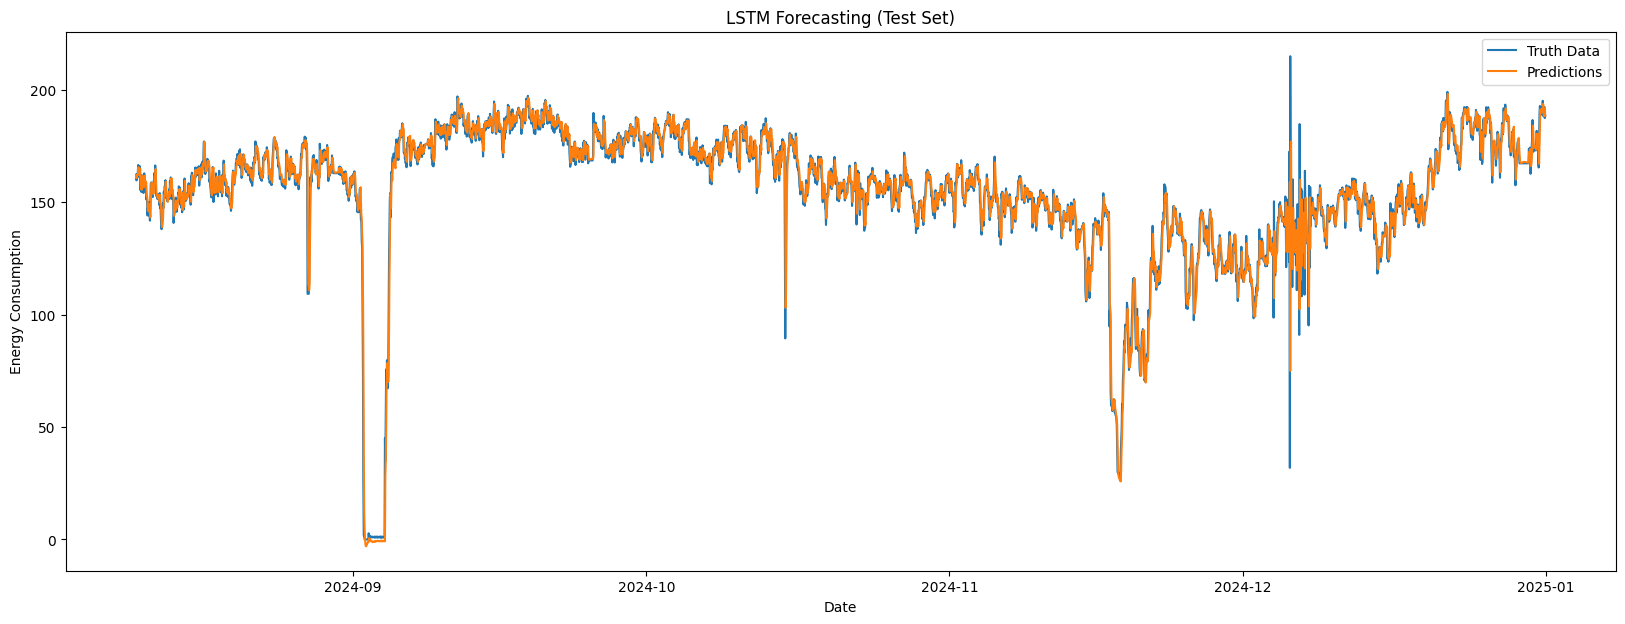

In [ ]:
# Plot
plt.figure(figsize=(10, 6))

# Plot predictions vs actual values
plt.figure(figsize=(20, 7))
plt.plot(test_data.index[best_lags:], y_test, label='Truth Data')
plt.plot(test_data.index[best_lags:], y_pred, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.title('LSTM Forecasting')
plt.show()

In [ ]:
best_model = random_search.best_estimator_  # Add this line

print(f"The Train error is {np.sqrt(mean_squared_error(y_train, best_model.predict(X_train)))}")

NameError: name 'random_search' is not defined

In [ ]:
score = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE Score on Test set: {score:.2f}')

NameError: name 'predictions' is not defined

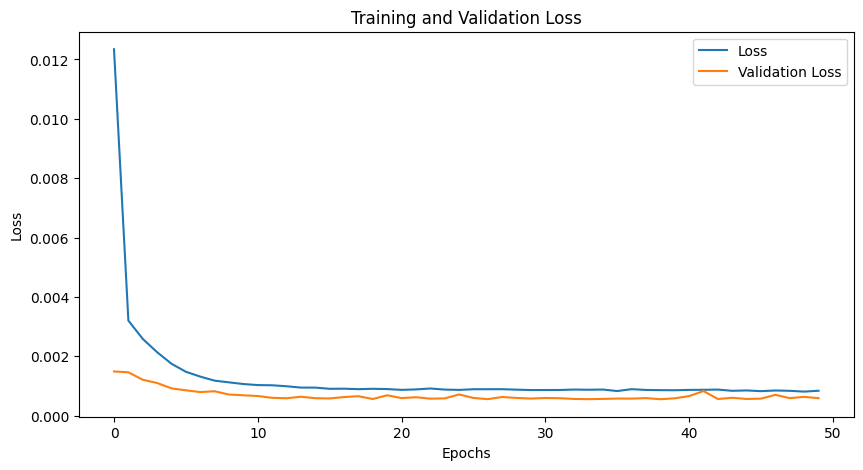

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Part 2 ปรับใช้ TimeSeriesSplit และ RandomizedSearchCV ในการเลือกพารามิเตอร์สำหรับ LSTM เช่นเดียวกับ XGBoost

In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.5 MB/s eta 0:00:00
  Atte

In [ ]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

# Function to create features with lagged values
def create_lstm_features(data, max_lags):
    df = data.copy()
    sequences = []
    targets = []

    for i in range(max_lags, len(df)):
        sequences.append(df.iloc[i - max_lags:i]['kwh'].values)
        targets.append(df.iloc[i]['kwh'])

    return np.array(sequences), np.array(targets)

# Load and scale data
scaler = MinMaxScaler()
train_data['kwh'] = scaler.fit_transform(train_data[['kwh']])
test_data['kwh'] = scaler.transform(test_data[['kwh']])

# Define number of lags
best_lags = 48  # Assume best_lags was selected
X_train, y_train = create_lstm_features(train_data, best_lags)
X_test, y_test = create_lstm_features(test_data, best_lags)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Function to build LSTM model
def build_lstm_model(optimizer='adam', dropout_rate=0.2, units=50):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(dropout_rate),
        LSTM(units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': uniform(0.1, 0.5),
    'units': randint(50, 200),
    'epochs': [50, 75],
    'batch_size': [32, 64, 128]
}

# Wrap LSTM model for use in RandomizedSearchCV
model = KerasRegressor(build_fn=build_lstm_model, verbose=0)

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings to sample
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
start_time = time.time()
random_search.fit(X_train, y_train)

# Training time
training_time = time.time() - start_time
print(f'Training time: {training_time/60:.2f} minutes')

# Best hyperparameters
print(f'Best hyperparameters: {random_search.best_params_}')

# Get the best model
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score on Test set: {rmse:.2f}')

# Plot predictions vs actual values
plt.figure(figsize=(20, 7))
plt.plot(test_data.index[best_lags:], y_test, label='Truth Data', color='blue')
plt.plot(test_data.index[best_lags:], y_pred, label='Predictions', color='red', linestyle='--')
plt.legend()
plt.title('Raw Data and Prediction')
plt.show()

<ipython-input-5-7fa61ff61733>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['kwh'] = scaler.fit_transform(train_data[['kwh']])
<ipython-input-5-7fa61ff61733>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['kwh'] = scaler.transform(test_data[['kwh']])


Fitting 3 folds for each of 10 candidates, totalling 30 fits


<ipython-input-5-7fa61ff61733>:63: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_lstm_model, verbose=0)
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


<Axes: xlabel='datetime'>

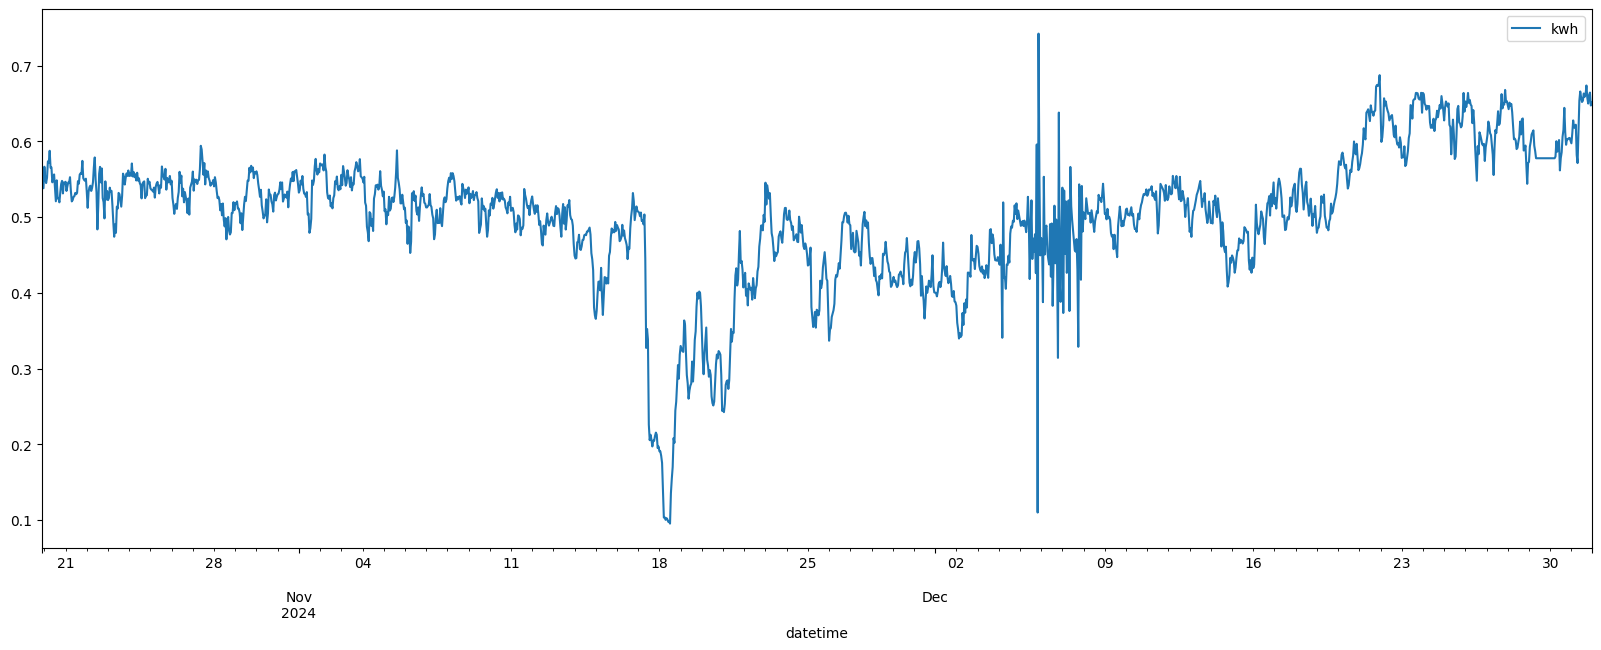

In [ ]:
test_data.plot(figsize=(20,7))

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
scaler=MinMaxScaler(feature_range=(0,1))
hourly_data=scaler.fit_transform(np.array(hourly_data).reshape(-1,1))

In [ ]:
train_data.shape

(14033, 1)

In [ ]:
valid_data.shape

(1754, 1)

In [ ]:
test_data.shape

(1755, 1)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=None):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----23   24
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 720
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(valid_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(14008, 24)
(14008,)


(None, None)

In [ ]:
print(X_val.shape), print(y_val.shape)

(1729, 24)
(1729,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(1730, 24)
(1730,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

opt = Adam(learning_rate=0.0005)
model.compile(loss='mean_squared_error', optimizer=opt)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 24, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 24, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=60,batch_size=64,verbose=1)

Epoch 1/60
208/208 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - loss: 0.0425 - val_loss: 5.8580e-04
Epoch 2/60
208/208 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - loss: 0.0024 - val_loss: 6.1394e-04
Epoch 3/60
208/208 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - loss: 0.0019 - val_loss: 5.9693e-04
Epoch 4/60
208/208 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - loss: 0.0019 - val_loss: 9.3364e-04
Epoch 5/60
208/208 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - loss: 0.0017 - val_loss: 5.2855e-04
Epoch 6/60
208/208 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - loss: 0.0015 - val_loss: 6.5498e-04
Epoch 7/60
208/208 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - loss: 0.0017 - val_loss: 5.5605e-04
Epoch 8/60
208/208 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - loss: 0.0012 - val_loss: 4.1476e-04
Epoch 9/60
208/208 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - loss: 0.0010 - val_loss: 7.4385e-04
Epoch 10/60
208/208 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - loss: 0.0011 - val_loss: 4.7623e-04
Epoch 11/60
208/208 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - loss: 9.4926e-04 - val_loss: 3.52

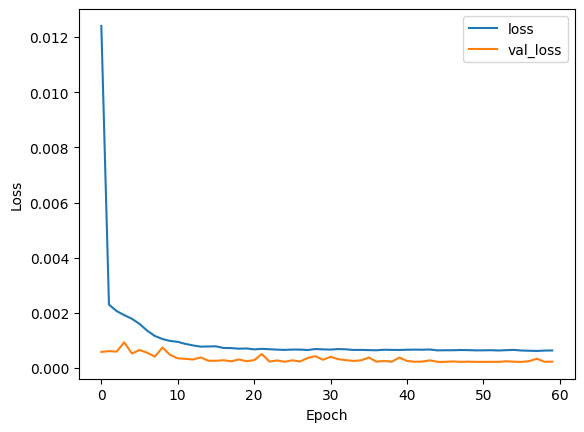

In [ ]:
# พล็อตค่า train&test loss
import matplotlib.pyplot as plt # Import the pyplot module and assign it the alias 'plt'

plt.plot(history.epoch, history.history['loss'], label='loss') # Changed the order of arguments
plt.plot(history.epoch, history.history['val_loss'], label='val_loss') # Added validation loss if available
plt.xlabel('Epoch') # Set x-axis label
plt.ylabel('Loss') # Set y-axis label
plt.legend()
plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
val_predict=model.predict(X_val)
test_predict = model.predict(X_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [ ]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
val_predict=scaler.inverse_transform(val_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
train_predict.shape, y_train.shape

((14008, 1), (14008,))

In [ ]:
### Train Data RMSE
math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))

6.831014601874637

In [ ]:
### Validation Data RMSE
math.sqrt(mean_squared_error(scaler.inverse_transform(y_val.reshape(-1,1)),val_predict))

5.243032723761518

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict))

7.798608247279827

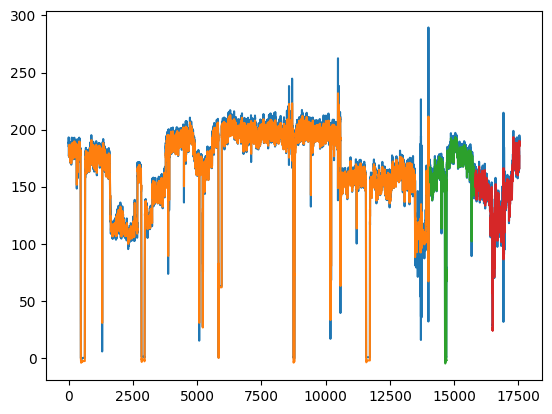

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(hourly_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift validation predictions for plotting
validPredictPlot = np.empty_like(hourly_data)
validPredictPlot[:, :] = np.nan
validPredictPlot[len(train_predict)+(look_back*2)+1:training_size+valid_size-1, :] = val_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(hourly_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+valid_size+1:len(hourly_data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(hourly_data))
plt.plot(trainPredictPlot)
plt.plot(validPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

1755

In [ ]:
# demonstrate prediction for next 30 days
n_steps = time_step
lst_output = []
i = 0

# Use the last 30 days of test data as initial input
x_input = test_data[-n_steps:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

while i < 24:
    if len(temp_input) > 24:
        x_input = np.array(temp_input[1:])
        print("{} hour input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} hour output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)

[0.6402258]
25
1 hour input [0.61055755 0.62765662 0.61850257 0.6178117  0.62195693 0.58205911
 0.57135129 0.6148755  0.65373701 0.66582726 0.65805496 0.65200983
 0.65373701 0.66323649 0.65891854 0.66116457 0.67377228 0.6575368
 0.64993791 0.66081913 0.66444552 0.64734645 0.65114624 0.64022583]
1 hour output [[0.6339568]]
2 hour input [0.62765662 0.61850257 0.6178117  0.62195693 0.58205911 0.57135129
 0.6148755  0.65373701 0.66582726 0.65805496 0.65200983 0.65373701
 0.66323649 0.65891854 0.66116457 0.67377228 0.6575368  0.64993791
 0.66081913 0.66444552 0.64734645 0.65114624 0.64022583 0.63395679]
2 hour output [[0.6281782]]
3 hour input [0.61850257 0.6178117  0.62195693 0.58205911 0.57135129 0.6148755
 0.65373701 0.66582726 0.65805496 0.65200983 0.65373701 0.66323649
 0.65891854 0.66116457 0.67377228 0.6575368  0.64993791 0.66081913
 0.66444552 0.64734645 0.65114624 0.64022583 0.63395679 0.62817818]
3 hour output [[0.62376565]]
4 hour input [0.6178117  0.62195693 0.58205911 0.5713512

In [ ]:
day_new=np.arange(1,25)
day_pred=np.arange(25,49)

In [ ]:
len(hourly_data)

17542

In [ ]:
plt.plot(day_new,scaler.inverse_transform(hourly_data[-24:])) # Slice data_cleanedhr to get the last 24 elements
plt.plot(day_pred,scaler.inverse_transform(lst_output))

NameError: name 'day_new' is not defined

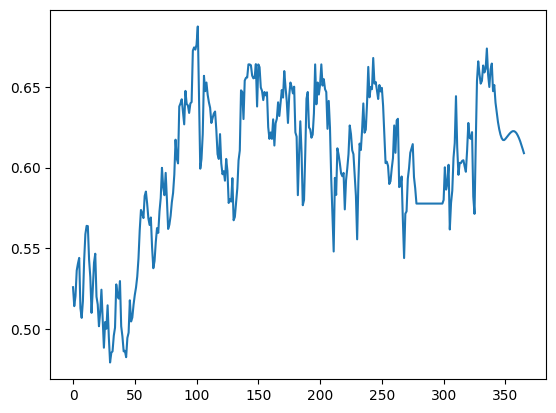

In [ ]:
data_next=hourly_data.tolist()
data_next.extend(lst_output)
plt.plot(data_next[17200:])

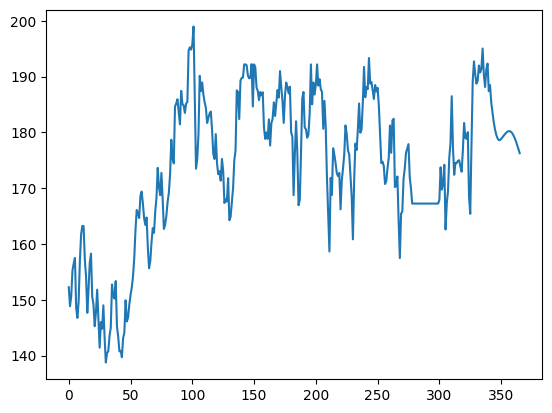

In [ ]:
plt.plot(scaler.inverse_transform(data_next[17200:]))

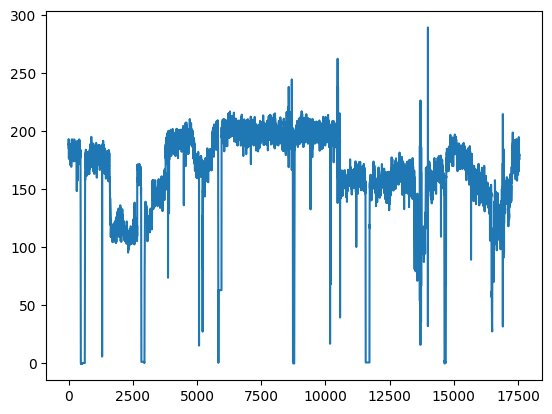

In [ ]:
data_next=scaler.inverse_transform(data_next).tolist()
plt.plot(data_next)

In [ ]:
model.save('Ori_LSTM_Hourly_Full.h5')